<a href="https://colab.research.google.com/github/CCanxue/CCanxue/blob/main/Canada%E5%A4%9A%E7%A7%8D%E8%AE%AD%E7%BB%83%E5%AE%9E%E6%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install d2l

57
torch.Size([32, 1, 112, 112])
(0.6633543006160803, 0.6080043859649122)
(0.6364484690783316, 0.6282894736842105)
(0.6020616988341013, 0.6343201754385965)
(0.6029119590918223, 0.6326754385964912)
(0.5830407346549787, 0.6529605263157895)
(0.5691729752640975, 0.6743421052631579)
(0.5586888633276287, 0.6737938596491229)
(0.5533266898832823, 0.6825657894736842)
(0.5412661788756388, 0.6929824561403509)
(0.5204022599939715, 0.7247807017543859)
(0.5138830453680273, 0.731359649122807)
(0.5311146791566882, 0.731359649122807)
(0.525507926940918, 0.7275219298245614)
(0.5114739835262299, 0.7406798245614035)
(0.5149554976245814, 0.7324561403508771)
(0.4949456536979006, 0.7423245614035088)
(0.496189088152166, 0.7297149122807017)
(0.5497969922266508, 0.7171052631578947)
(0.4827814891672971, 0.7483552631578947)
(0.47453347371335614, 0.7620614035087719)


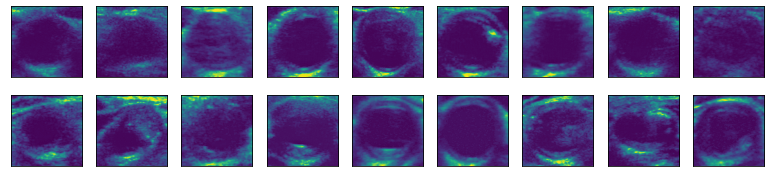

In [12]:
import torch
from torch.utils import data
import os
from PIL import Image
from torchvision.io import read_image
from torchvision import transforms
from d2l import torch as d2l
from torch import nn
class CanandaDataset(data.Dataset):
  def __init__(self,root_dir,label_dir,transform=None):
    self.root_dir=root_dir
    self.list_=[]
    self.transform=transform
    with open(label_dir,'r') as f:
      lines=f.readlines()
      for line in lines:
        imbel=line.split()
        imbel[0]=os.path.join(root_dir,imbel[0])
        self.list_.append((imbel[0],int(imbel[1])))
  def __len__(self):
    return len(os.listdir(self.root_dir))
  def __getitem__(self,idx):
    img=Image.open(self.list_[idx][0])
    if self.transform:
      img=self.transform(img)
    label=self.list_[idx][1]
    return img,label
train_data=CanandaDataset("/content/drive/MyDrive/Canada data/ROI1_1828","//content//drive//MyDrive//Canada data//label1828.txt",transform=transforms.ToTensor())
data_iter=data.DataLoader(train_data,batch_size=32,shuffle=True,num_workers=2,drop_last=True)
print(len(data_iter))
for x,y in data_iter:
  print(x.shape)
  d2l.show_images(x[:18].reshape(18,112,112),2,9)
  break
lr=0.1
num_epochs=20
#net=nn.Sequential(nn.Flatten(),nn.Linear(112*112,2))
net=nn.Sequential(nn.Flatten(),nn.Linear(112*112,5000),nn.ReLU(),nn.Linear(5000,1000),nn.ReLU(),nn.Linear(1000,200),nn.ReLU(),nn.Linear(200,10),nn.ReLU(),nn.Linear(10,2))
loss=nn.CrossEntropyLoss(reduction='none')
trainer=torch.optim.SGD(net.parameters(),lr=0.1)
for epoch in range(num_epochs):
  print(d2l.train_epoch_ch3(net,data_iter,loss,trainer))

In [46]:
import os
from PIL import Image
root_dir="/content/drive/MyDrive/Canada data/ROI1_1828"
list1=os.listdir("/content/drive/MyDrive/Canada data/ROI1_1828")
list2=os.listdir("/content/drive/MyDrive/Canada data/ROI2_1828")
list1.extend(list2)
list_=[]
with open("//content//drive//MyDrive//Canada data//label1828.txt",'r') as f:
  lines=f.readlines()
  for line in lines:
    imbel=line.split()
    imbel[0]=os.path.join(root_dir,imbel[0])
    list_.append((imbel[0],int(imbel[1])))
print(list_)

[('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--0-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--1-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--10-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--11-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L—cca-l--12-1.bmp', 0), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--2-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--3-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--4-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--5-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--6-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--7-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-l--8-1.bmp', 1), ('/content/drive/MyDrive/Canada data/ROI1_1828/0340_1_L--cca-